Questions:
Answer these questions with graphs and tables and paste your coding here.

In [214]:
# All Imports
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

#### 1. Please take a look at the data types and summary of our variables.

In [215]:
df = pandas.read_csv('ClimateData.csv')

In [216]:
df.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,NaN,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,NaN,3.90


In [217]:
df.tail()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,NaN,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,NaN,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,NaN,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,NaN,592.02
75756,75756,Residential,23888.0,1974.0,107.69,28.8,49.127397,NaN,29.15


In [218]:
df.shape

(75757, 9)

In [219]:
df.dtypes

id                        int64
building_class           object
floor_area              float64
year_built              float64
precipitation_inches    float64
snowfall_inches         float64
avg_temp                float64
days_with_fog           float64
site_eui                float64
dtype: object

#### 2. Summarize the number of unique values in each column.

In [220]:
for col in df:
    print("\n",col,"\n")
    print(df[col].unique())


 id 

[    0     1     2 ... 75754 75755 75756]

 building_class 

['Commercial' 'Residential']

 floor_area 

[ 61242. 274000. 280025. ... 103345.  36353.  40489.]

 year_built 

[1942. 1955. 1951. 1980. 1985. 1956. 1982. 1947. 1929. 1979. 1927. 1960.
 1924.   nan 1949. 1926. 1914. 1973. 1900. 1913. 1962. 1989. 1967. 1954.
 1986. 1906. 1912. 1902. 1920. 1905. 1997. 1909. 2002. 1974. 1907. 1908.
 1988. 1987. 1923. 1948. 1966. 1975. 1934. 1938. 1983. 2003. 1915. 1961.
 1911. 1925. 1964. 1953. 1957. 2006. 1990. 1991. 1969. 1968. 1910. 1937.
 1971. 1965. 1946. 1917. 1901. 2000. 2008. 1999. 1981. 2001. 1978. 1898.
 1928. 1970. 1918. 1930. 1903. 1936. 1921. 1922. 1984. 1976. 1952. 1959.
 1916. 1963. 1972. 1919. 1931. 1958.    0. 1994. 1940. 2010. 2009. 1889.
 1939. 1945. 1904. 1932. 1941. 1977. 1993. 1992. 1950. 1944. 1935. 1996.
 1995. 1933. 1943. 2007. 2005. 2004. 1869. 2011. 2012. 1864. 1998. 1895.
 1896. 1875. 1880. 1888. 1897. 1891. 2013. 1887. 1882. 1886. 1890. 1789.
 1868. 1885. 201

#### 3. Check at descriptive statistics for the Dataset.

In [221]:
df.describe()

,id,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
count,75757.000000,7.575700e+04,73920.000000,75757.000000,75757.000000,75757.000000,29961.000000,75757.000000
mean,37878.000000,1.659839e+05,1952.306764,42.430651,29.136379,56.176705,109.142051,82.584707
std,21869.306509,2.468758e+05,37.053619,10.592205,17.810894,2.241940,50.699751,58.255413
min,0.000000,9.430000e+02,0.000000,0.000000,0.000000,44.512329,12.000000,1.000000
25%,18939.000000,6.237900e+04,1927.000000,39.350000,9.600000,55.147541,88.000000,54.530000
50%,37878.000000,9.136700e+04,1951.000000,42.170000,31.600000,56.835616,104.000000,75.290000
75%,56817.000000,1.660000e+05,1977.000000,46.320000,49.100000,57.215847,131.000000,97.280000
max,75756.000000,6.385382e+06,2015.000000,107.690000,127.300000,77.245205,311.000000,997.870000


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    75757 non-null  int64  
 1   building_class        75757 non-null  object 
 2   floor_area            75757 non-null  float64
 3   year_built            73920 non-null  float64
 4   precipitation_inches  75757 non-null  float64
 5   snowfall_inches       75757 non-null  float64
 6   avg_temp              75757 non-null  float64
 7   days_with_fog         29961 non-null  float64
 8   site_eui              75757 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.2+ MB


#### 4. Check the number of missing values.

In [223]:
print("Total Nan for column in the data is :\n", df[df.columns[df.isnull().any()]].isnull().sum())

Total Nan for column in the data is :
 year_built        1837
days_with_fog    45796
dtype: int64


In [224]:
print("Percentage Missing of NaN values for the columns in data:\n",df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0])

Percentage Missing of NaN values for the columns in data:
 year_built        2.424858
days_with_fog    60.451179
dtype: float64


#### 5. Take care of missing data. You can decide to remove or use the imputation.

In [225]:
df = df.fillna(df.median())

/var/folders/p3/vzn3lx257fl9kxj8f1lgfc_m0000gn/T/ipykernel_17875/3493596106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


In [226]:
print("Total Nan for column in the data is :\n", df[df.columns[df.isnull().any()]].isnull().sum())

Total Nan for column in the data is :
 Series([], dtype: float64)


#### 6. Find and removeduplicate variables,

In [227]:
df.drop_duplicates()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,104.0,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,104.0,3.90
...,...,...,...,...,...,...,...,...,...
75752,75752,Commercial,20410.0,1995.0,45.03,1.4,55.147541,104.0,132.92
75753,75753,Residential,40489.0,1910.0,45.03,1.4,55.147541,104.0,39.48
75754,75754,Commercial,28072.0,1917.0,106.32,36.6,47.911202,104.0,48.40
75755,75755,Commercial,53575.0,2012.0,106.32,36.6,47.911202,104.0,592.02


In [228]:
print("Number of Duplicates is ",df.duplicated().sum())

Number of Duplicates is  0


#### 7. Encode the categorical variables; you can use label encoding, one hot encoding, or...

In [229]:
df.head()

,id,building_class,floor_area,year_built,precipitation_inches,snowfall_inches,avg_temp,days_with_fog,site_eui
0,0,Commercial,61242.0,1942.0,16.59,0.0,56.972603,104.0,248.68
1,1,Commercial,274000.0,1955.0,16.59,0.0,56.972603,12.0,26.50
2,2,Commercial,280025.0,1951.0,16.59,0.0,56.972603,12.0,24.69
3,3,Commercial,55325.0,1980.0,16.59,0.0,56.972603,12.0,48.41
4,4,Commercial,66000.0,1985.0,16.59,0.0,56.972603,104.0,3.90


In [230]:
new_df = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')

In [231]:
df = np.array(new_df.fit_transform(df))
df

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.69726027e+01, 1.04000000e+02, 2.48680000e+02],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        5.69726027e+01, 1.20000000e+01, 2.65000000e+01],
       [1.00000000e+00, 0.00000000e+00, 2.00000000e+00, ...,
        5.69726027e+01, 1.20000000e+01, 2.46900000e+01],
       ...,
       [1.00000000e+00, 0.00000000e+00, 7.57540000e+04, ...,
        4.79112022e+01, 1.04000000e+02, 4.84000000e+01],
       [1.00000000e+00, 0.00000000e+00, 7.57550000e+04, ...,
        4.79112022e+01, 1.04000000e+02, 5.92020000e+02],
       [0.00000000e+00, 1.00000000e+00, 7.57560000e+04, ...,
        4.91273973e+01, 1.04000000e+02, 2.91500000e+01]])

#### 8. Create the boxplot and show the outlier.

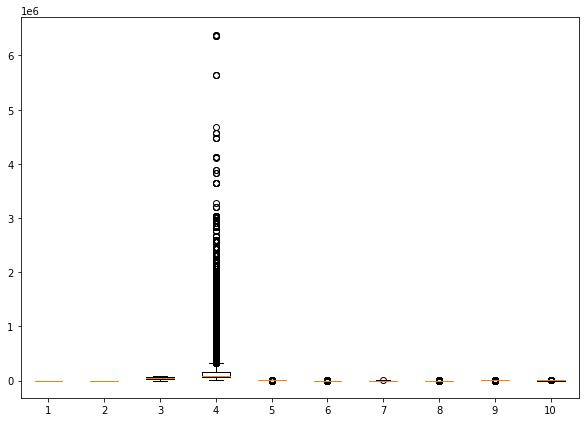

In [232]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df)
plt.show()

### Clearly the fourth column is the outlier for the box plot

#### 9. Create thehistogram and check the outliers.

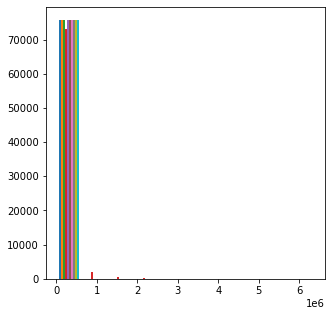

In [233]:
fig = plt.figure(figsize =(5, 5))
plt.hist(df,bins = 10)
plt.show()

#### 10. If feature scaling is needed, do it, please.

In [234]:
sc = StandardScaler()
sc.fit(df[:,5:])
df = sc.transform(df[:,5:])

In [235]:
print(df)

[[-2.43960747 -1.63588486  0.35500655 -0.06358555  2.85117521]
 [-2.43960747 -1.63588486  0.35500655 -2.94016484 -0.96274448]
 [-2.43960747 -1.63588486  0.35500655 -2.94016484 -0.99381476]
 ...
 [ 6.03177265  0.41905082 -3.68678839 -0.06358555 -0.58681127]
 [ 6.03177265  0.41905082 -3.68678839 -0.06358555  8.74491537]
 [ 6.1611139  -0.01888629 -3.14431032 -0.06358555 -0.91725485]]


### Graphs with Feature Selection

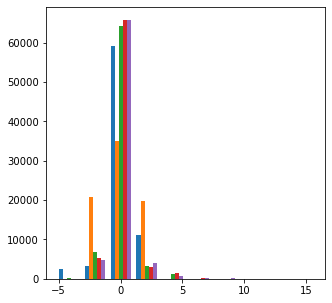

In [236]:
fig = plt.figure(figsize =(5, 5))
plt.hist(df,bins = 10)
plt.show()

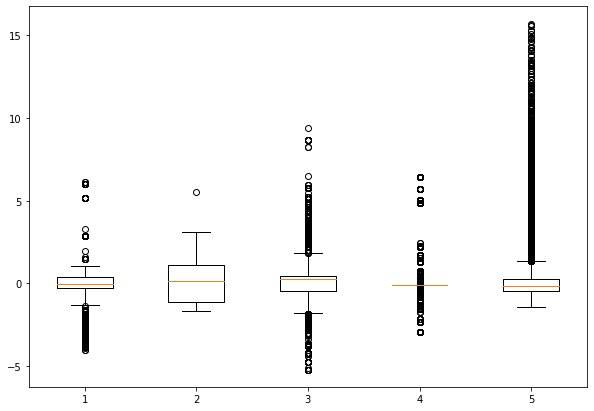

In [237]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df)
plt.show()